# Uploading the CSV file

In [112]:
import pandas as pd
data = pd.read_csv("backloggd_games.csv")
data

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,3,0
59996,59996,Pathfinder: Kingmaker - Definitive Edition,"Aug 18, 2020","['Owlcat Games', 'Deep Silver']",The Definitive Edition will have all of the DL...,"['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7,9,0,19,1,7,1
59997,59997,Sainth,"Apr 11, 2008",['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",['Windows PC'],[],NaN,1,0,0,2,0,0
59998,59998,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,3,0


In [113]:
import warnings
warnings.filterwarnings('ignore')

# Understanding the data

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [115]:
data.describe()

,Unnamed: 0,Rating
count,60000.000000,25405.000000
mean,29999.500000,3.033171
std,17320.652413,0.735573
min,0.000000,0.300000
25%,14999.750000,2.600000
50%,29999.500000,3.100000
75%,44999.250000,3.500000
max,59999.000000,5.000000


In [116]:
data.shape

(60000, 14)

# Data Cleaning

### Converting column name to lower case

In [117]:
def clean_columns(c):
    c = c.lower()
    return c
new_column = []
for i in data.columns:
    x = clean_columns(i)
    new_column.append(x)
data.columns = new_column
print(data.columns)

Index(['unnamed: 0', 'title', 'release_date', 'developers', 'summary',
       'platforms', 'genres', 'rating', 'plays', 'playing', 'backlogs',
       'wishlist', 'lists', 'reviews'],
      dtype='object')


### Dropping unwanted columns

In [118]:
data.drop('unnamed: 0', axis = 'columns', inplace = True)
data.drop('summary', axis= 1, inplace=True)
data.head(2)

,title,release_date,developers,platforms,genres,rating,plays,playing,backlogs,wishlist,lists,reviews
0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...","['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K


### Changing the data type of data

In [119]:
data['plays'].unique()

array(['21K', '35K', '25K', ..., '456', '925', '684'], dtype=object)

In [120]:
data['plays'] = data['plays'].str.replace('K', '')
print(data['plays'].unique())

['21' '35' '25' ... '456' '925' '684']


In [121]:
data['plays'] = data['plays'].astype(float)
print(data['plays'].unique())

[ 21.  35.  25. ... 456. 925. 684.]


In [122]:
data['playing'].unique()

array(['4.1K', '3.1K', '3.5K', '2.7K', '728', '2.1K', '1.2K', '4.6K',
       '908', '1.3K', '2.6K', '480', '791', '556', '925', '1.4K', '854',
       '2K', '824', '281', '958', '534', '1.7K', '857', '1.6K', '692',
       '959', '821', '522', '1K', '1.1K', '974', '737', '477', '2.9K',
       '1.5K', '405', '736', '878', '546', '608', '2.3K', '342', '551',
       '411', '819', '675', '428', '689', '586', '543', '661', '998',
       '562', '479', '340', '904', '526', '611', '406', '527', '681',
       '236', '448', '939', '632', '569', '1.9K', '252', '172', '385',
       '391', '876', '75', '249', '797', '346', '653', '596', '305',
       '331', '232', '310', '840', '322', '278', '841', '696', '445',
       '505', '271', '375', '297', '870', '921', '333', '209', '330',
       '763', '645', '497', '490', '334', '638', '666', '324', '591',
       '825', '150', '184', '430', '501', '216', '488', '300', '154',
       '243', '147', '483', '485', '208', '399', '309', '776', '65',
       '128', 

In [123]:
data['playing'] = data['playing'].str.replace('K','')
data['playing'].unique()

array(['4.1', '3.1', '3.5', '2.7', '728', '2.1', '1.2', '4.6', '908',
       '1.3', '2.6', '480', '791', '556', '925', '1.4', '854', '2', '824',
       '281', '958', '534', '1.7', '857', '1.6', '692', '959', '821',
       '522', '1', '1.1', '974', '737', '477', '2.9', '1.5', '405', '736',
       '878', '546', '608', '2.3', '342', '551', '411', '819', '675',
       '428', '689', '586', '543', '661', '998', '562', '479', '340',
       '904', '526', '611', '406', '527', '681', '236', '448', '939',
       '632', '569', '1.9', '252', '172', '385', '391', '876', '75',
       '249', '797', '346', '653', '596', '305', '331', '232', '310',
       '840', '322', '278', '841', '696', '445', '505', '271', '375',
       '297', '870', '921', '333', '209', '330', '763', '645', '497',
       '490', '334', '638', '666', '324', '591', '825', '150', '184',
       '430', '501', '216', '488', '300', '154', '243', '147', '483',
       '485', '208', '399', '309', '776', '65', '128', '420', '304',
       '104'

In [124]:
data['playing'] = data['playing'].astype(float)
data['playing'].unique()

array([  4.1,   3.1,   3.5,   2.7, 728. ,   2.1,   1.2,   4.6, 908. ,
         1.3,   2.6, 480. , 791. , 556. , 925. ,   1.4, 854. ,   2. ,
       824. , 281. , 958. , 534. ,   1.7, 857. ,   1.6, 692. , 959. ,
       821. , 522. ,   1. ,   1.1, 974. , 737. , 477. ,   2.9,   1.5,
       405. , 736. , 878. , 546. , 608. ,   2.3, 342. , 551. , 411. ,
       819. , 675. , 428. , 689. , 586. , 543. , 661. , 998. , 562. ,
       479. , 340. , 904. , 526. , 611. , 406. , 527. , 681. , 236. ,
       448. , 939. , 632. , 569. ,   1.9, 252. , 172. , 385. , 391. ,
       876. ,  75. , 249. , 797. , 346. , 653. , 596. , 305. , 331. ,
       232. , 310. , 840. , 322. , 278. , 841. , 696. , 445. , 505. ,
       271. , 375. , 297. , 870. , 921. , 333. , 209. , 330. , 763. ,
       645. , 497. , 490. , 334. , 638. , 666. , 324. , 591. , 825. ,
       150. , 184. , 430. , 501. , 216. , 488. , 300. , 154. , 243. ,
       147. , 483. , 485. , 208. , 399. , 309. , 776. ,  65. , 128. ,
       420. , 304. ,

In [125]:
data['playing'].dtype

dtype('float64')

In [126]:
data['backlogs'] = data['backlogs'].str.replace('K','')
data['backlogs'].unique()

array(['5.6', '7.3', '9.6', '5.7', '1.3', '5.3', '3', '2.1', '7.2', '6.1',
       '877', '4.1', '4.7', '2.5', '6.7', '6.5', '3.2', '7.4', '6.6',
       '3.5', '3.7', '5', '2.8', '3.4', '6', '2.7', '2.9', '4.9', '4.3',
       '2.6', '1.4', '5.8', '3.3', '3.6', '4.2', '7.1', '5.5', '4.8',
       '357', '3.1', '3.9', '2.2', '546', '899', '4.4', '1.7', '693', '2',
       '1.5', '4.6', '839', '2.4', '5.2', '914', '448', '3.8', '980',
       '1.8', '371', '1.9', '428', '611', '219', '609', '1.6', '812',
       '785', '1.1', '908', '541', '376', '967', '1.2', '964', '2.3',
       '645', '577', '623', '1', '493', '795', '487', '550', '764', '767',
       '497', '533', '913', '227', '733', '979', '759', '824', '789',
       '809', '399', '606', '197', '849', '926', '474', '323', '923',
       '211', '524', '686', '4', '717', '911', '958', '831', '891', '986',
       '798', '808', '512', '852', '354', '960', '699', '818', '872',
       '420', '774', '773', '770', '663', '456', '737', '811', '794

In [127]:
data['backlogs'] = data['backlogs'].astype(float)
data['backlogs'].dtype

dtype('float64')

In [128]:
data['wishlist'] = data['wishlist'].str.replace('K','')
data['wishlist'].unique()

array(['5.5', '3', '4', '2.6', '2.1', '265', '4.3', '5.2', '3.5', '138',
       '3.7', '1.4', '2.9', '2.8', '2.2', '3.8', '3.9', '3.3', '2.3',
       '1.2', '757', '2.4', '3.1', '2.5', '881', '907', '4.1', '1.7',
       '305', '3.2', '3.6', '1.6', '1.3', '1.8', '2', '2.7', '176', '54',
       '1.9', '469', '1.5', '276', '1.1', '524', '263', '687', '999',
       '831', '846', '709', '222', '783', '826', '419', '791', '62',
       '797', '218', '862', '180', '529', '959', '43', '874', '580',
       '287', '424', '897', '772', '586', '782', '124', '934', '284',
       '417', '184', '111', '593', '588', '425', '608', '335', '839',
       '967', '793', '537', '780', '603', '888', '515', '90', '662',
       '942', '762', '94', '664', '950', '414', '494', '890', '279',
       '820', '109', '371', '1', '576', '535', '672', '269', '691', '889',
       '511', '631', '332', '542', '589', '95', '523', '724', '596',
       '939', '833', '574', '613', '23', '350', '421', '739', '977',
       '800', 

In [129]:
data['wishlist'] = data['wishlist'].astype(float)

In [130]:
data['wishlist'].dtype

dtype('float64')

In [131]:
data['lists'] = data['lists'].str.replace('K','')
data['lists'].unique()

array(['4.6', '5.1', '3.2', '3.4', '3.9', '2.6', '1.8', '1.9', '3.1',
       '975', '2.3', '3.3', '1.3', '3.8', '1.7', '3.5', '2.4', '2', '2.9',
       '2.8', '2.1', '1', '740', '2.2', '2.7', '624', '595', '1.1', '967',
       '987', '1.2', '993', '1.5', '654', '1.6', '1.4', '2.5', '787',
       '764', '887', '561', '672', '542', '645', '878', '145', '947',
       '661', '733', '998', '452', '904', '653', '927', '781', '853',
       '641', '880', '705', '945', '692', '771', '949', '820', '823',
       '925', '831', '440', '688', '683', '929', '372', '563', '755',
       '707', '652', '980', '663', '938', '367', '517', '997', '723',
       '830', '912', '914', '586', '425', '930', '905', '470', '444',
       '775', '543', '756', '566', '952', '472', '852', '939', '782',
       '960', '995', '818', '715', '788', '567', '849', '151', '649',
       '514', '720', '957', '623', '552', '696', '760', '539', '679',
       '839', '342', '651', '749', '926', '395', '710', '888', '797',
       '44

In [132]:
data['lists'] = data['lists'].astype(float)
data['lists'].dtype

dtype('float64')

In [133]:
data['reviews'] = data['reviews'].str.replace('K','')
data['reviews'].unique()

array(['3', '2.1', '2.5', '2.7', '1.4', '1.1', '1.7', '2.6', '1.9', '1.6',
       '2', '1.5', '1.2', '874', '815', '1', '1.8', '784', '1.3', '926',
       '578', '841', '944', '880', '812', '630', '958', '641', '959',
       '644', '857', '795', '878', '912', '790', '744', '582', '928',
       '741', '855', '457', '520', '924', '666', '842', '743', '983',
       '714', '723', '922', '843', '765', '988', '735', '819', '522',
       '468', '733', '813', '571', '931', '758', '825', '801', '710',
       '702', '658', '746', '884', '966', '764', '422', '621', '832',
       '483', '977', '891', '555', '823', '869', '717', '534', '498',
       '883', '867', '872', '761', '824', '591', '692', '905', '533',
       '645', '675', '565', '540', '713', '598', '933', '328', '583',
       '603', '359', '826', '364', '721', '544', '543', '810', '501',
       '793', '762', '512', '668', '253', '617', '677', '612', '613',
       '393', '752', '485', '474', '625', '504', '623', '556', '519',
       '389'

In [134]:
data['reviews'] = data['reviews'].astype(float)
data['reviews'].dtype

dtype('float64')

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         60000 non-null  object 
 1   release_date  60000 non-null  object 
 2   developers    60000 non-null  object 
 3   platforms     60000 non-null  object 
 4   genres        60000 non-null  object 
 5   rating        25405 non-null  float64
 6   plays         60000 non-null  float64
 7   playing       60000 non-null  float64
 8   backlogs      60000 non-null  float64
 9   wishlist      60000 non-null  float64
 10  lists         60000 non-null  float64
 11  reviews       60000 non-null  float64
dtypes: float64(7), object(5)
memory usage: 5.5+ MB


In [136]:
data['platforms'].unique()

array(["['Windows PC', 'PlayStation 4', 'Xbox One', 'PlayStation 5', 'Xbox Series']",
       "['Wii U', 'Nintendo Switch']",
       "['Windows PC', 'Mac', 'PlayStation 4', 'Xbox One', 'PlayStation 5', 'Nintendo Switch', 'Xbox Series']",
       ...,
       "['Windows PC', 'Nintendo GameCube', 'Xbox', 'PlayStation', 'PlayStation 2']",
       "['Sega Mega Drive/Genesis', 'Atari ST/STE', 'Arcade', 'Wii', 'Amiga', 'Commodore C64/128', 'ZX Spectrum', 'Amstrad CPC', 'TurboGrafx-16/PC Engine']",
       "['Windows PC', 'PlayStation 4', 'Oculus VR', 'Oculus Quest']"],
      dtype=object)

### Droping missing values

In [137]:
print(data.isnull().sum())

title               0
release_date        0
developers          0
platforms           0
genres              0
rating          34595
plays               0
playing             0
backlogs            0
wishlist            0
lists               0
reviews             0
dtype: int64


In [138]:
data = data.dropna(axis=0)
print(data.isnull().sum())

title           0
release_date    0
developers      0
platforms       0
genres          0
rating          0
plays           0
playing         0
backlogs        0
wishlist        0
lists           0
reviews         0
dtype: int64


In [139]:
data['playing'] = data['playing']*1000
data['plays'] = data['plays'] *1000
data['backlogs'] = data['backlogs']*1000
data['wishlist'] = data['wishlist']*1000
data['lists'] = data['lists']*1000
data['reviews'] = data['reviews']*1000


# Visualising Data

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Scatter plot to explore the relationship between "plays" vs "playing"

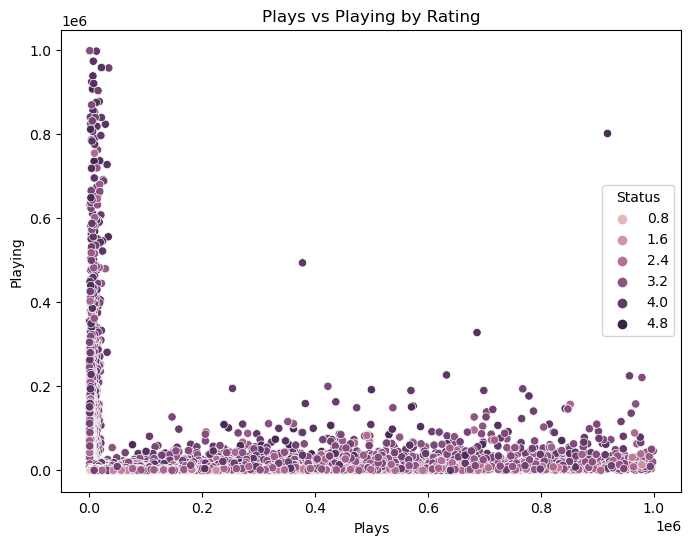

In [141]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='plays', y='playing', hue='rating')
plt.title('Plays vs Playing by Rating')
plt.xlabel('Plays')
plt.ylabel('Playing')
plt.legend(title='Status')
plt.show()

### Boxplot to visualize the distribution of game ratings

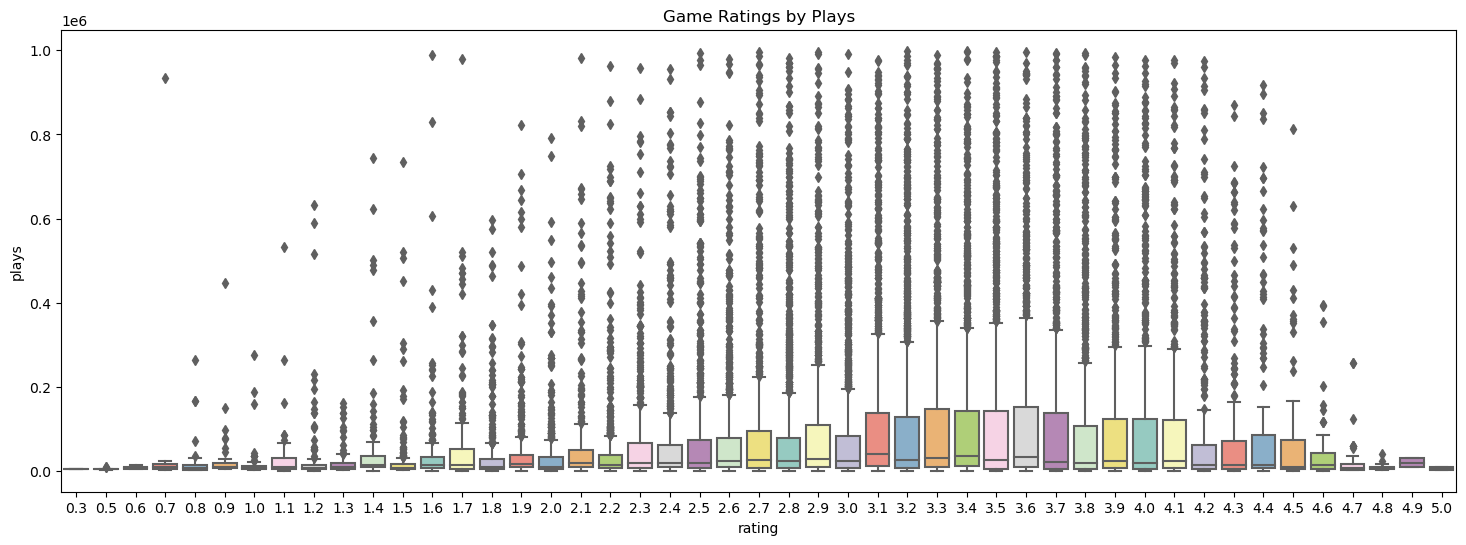

In [142]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=data, x='rating', y='plays', palette='Set3')
plt.title('Game Ratings by Plays')
plt.xlabel('rating')
plt.ylabel('plays')
plt.show()

### Histogram for "Wishlist"

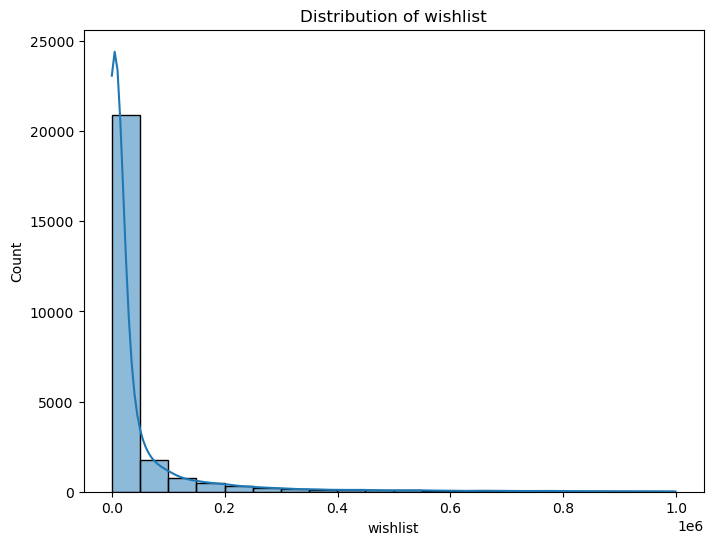

In [145]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='wishlist', bins=20, kde=True)
plt.title('Distribution of wishlist')
plt.xlabel('wishlist')
plt.ylabel('Count')
plt.show()

### Correlation Heatmap of the Data Set

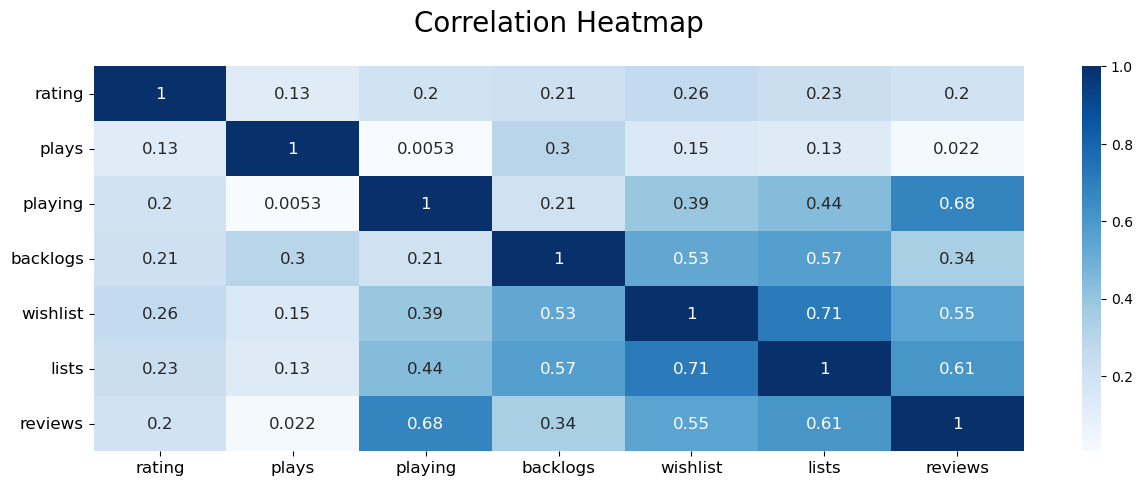

In [143]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 5))


sns.heatmap(corr_matrix, annot=True, cmap="Blues", annot_kws={"size": 12}, ax=ax)
ax.set_title("Correlation Heatmap", fontsize=20, pad=25)
ax.tick_params(axis="both", labelsize=12)

plt.show()